PROMPT:

Using the above cyber-threat dataset, apply suitable threat-detection methods and perform complete data analysis, then provide full Python code for the entire process in a simple and clear wa.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.tree import DecisionTreeClassifier


In [2]:
# Load the Excel dataset
df = pd.read_excel("/content/cyber_threats_last_5_years.xlsx")

print(df.head())
print(df.info())


   Year Attacker IP Address Target IP Address Attacker Location  \
0  2021        44.86.84.108     23.130.92.252             China   
1  2021     116.101.192.151    19.176.184.206           Germany   
2  2021      246.52.119.215     151.253.58.28            Brazil   
3  2021       31.47.109.199    12.139.228.180            Russia   
4  2021      109.85.179.172      129.4.97.203     United States   

  Type of Attack    Device of Attack Security Type Involved  
0  SQL Injection       Mobile Device                    WAF  
1       Phishing  Compromised Server             Zero Trust  
2    Brute Force  Compromised Server                IDS/IPS  
3        Malware       Mobile Device                IDS/IPS  
4       Phishing              Laptop                IDS/IPS  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year        

In [3]:
# Check missing values
print(df.isnull().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)


Year                      0
Attacker IP Address       0
Target IP Address         0
Attacker Location         0
Type of Attack            0
Device of Attack          0
Security Type Involved    0
dtype: int64


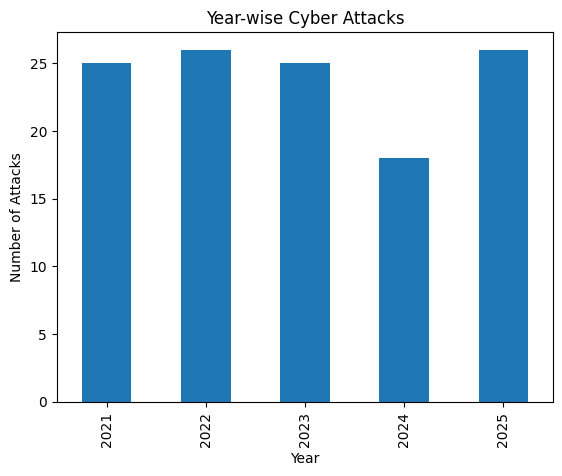

In [4]:
plt.figure()
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title("Year-wise Cyber Attacks")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.show()


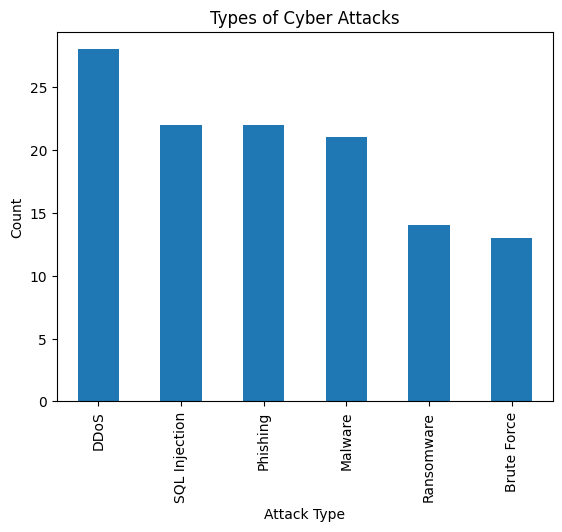

In [5]:
plt.figure()
df['Type of Attack'].value_counts().plot(kind='bar')
plt.title("Types of Cyber Attacks")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.show()


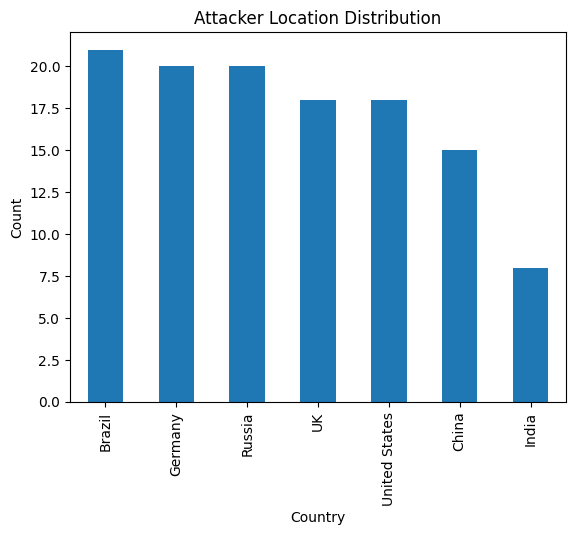

In [6]:
plt.figure()
df['Attacker Location'].value_counts().plot(kind='bar')
plt.title("Attacker Location Distribution")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


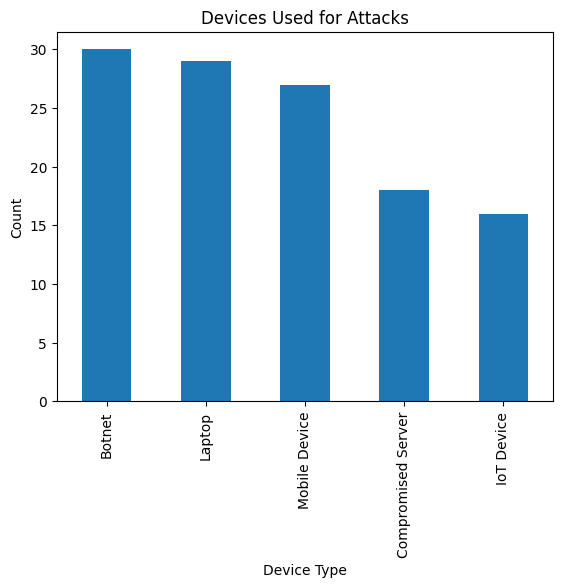

In [7]:
plt.figure()
df['Device of Attack'].value_counts().plot(kind='bar')
plt.title("Devices Used for Attacks")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.show()


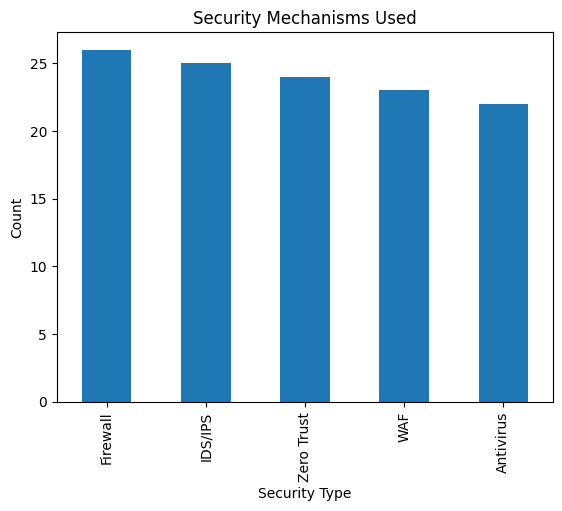

In [8]:
plt.figure()
df['Security Type Involved'].value_counts().plot(kind='bar')
plt.title("Security Mechanisms Used")
plt.xlabel("Security Type")
plt.ylabel("Count")
plt.show()


In [9]:
encoder = LabelEncoder()

columns_to_encode = [
    'Attacker Location',
    'Type of Attack',
    'Device of Attack',
    'Security Type Involved'
]

for col in columns_to_encode:
    df[col] = encoder.fit_transform(df[col])


In [10]:
def ip_to_int(ip):
    parts = ip.split('.')
    return sum(int(parts[i]) << (8 * (3 - i)) for i in range(4))

df['Attacker IP Address'] = df['Attacker IP Address'].apply(ip_to_int)
df['Target IP Address'] = df['Target IP Address'].apply(ip_to_int)


In [11]:
X = df.drop(['Type of Attack'], axis=1)
y = df['Type of Attack']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [13]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.2222222222222222
              precision    recall  f1-score   support

           0       0.17      0.25      0.20         4
           1       0.17      0.12      0.14         8
           2       0.10      0.50      0.17         2
           3       0.22      0.22      0.22         9
           4       0.00      0.00      0.00         6
           5       1.00      0.43      0.60         7

    accuracy                           0.22        36
   macro avg       0.28      0.25      0.22        36
weighted avg       0.31      0.22      0.24        36



In [14]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.1111111111111111
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.08      0.12      0.10         8
           2       0.12      1.00      0.22         2
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         6
           5       0.50      0.14      0.22         7

    accuracy                           0.11        36
   macro avg       0.12      0.21      0.09        36
weighted avg       0.12      0.11      0.08        36



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


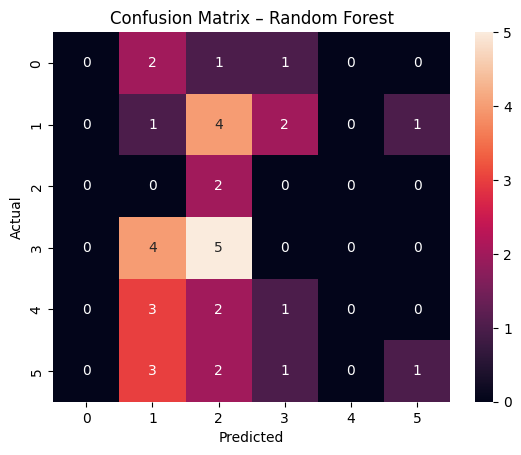

In [15]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(X)

# -1 = anomaly, 1 = normal
df['Anomaly'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

print(df['Anomaly'].value_counts())


Anomaly
Normal     108
Anomaly     12
Name: count, dtype: int64


In [17]:
importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                  Feature  Importance
1     Attacker IP Address    0.237268
2       Target IP Address    0.232312
3       Attacker Location    0.151644
5  Security Type Involved    0.133989
4        Device of Attack    0.126546
0                    Year    0.118241


In [18]:
print("Most frequent attack type:",
      df['Type of Attack'].value_counts().idxmax())

print("Most common attacker location:",
      df['Attacker Location'].value_counts().idxmax())

print("Most used attack device:",
      df['Device of Attack'].value_counts().idxmax())


Most frequent attack type: 1
Most common attacker location: 0
Most used attack device: 0
